Our goal is to build a regression model that can predict/forcast housing prices in Miami, Florida. 

The ability to predict housing prices is a crucial tool for many individuals and businesses. Homeowners and potential homebuyers can use this information to make informed decisions about buying or selling properties. Real estate agents and investors can use it to determine market trends and identify potential investment opportunities. Therefore, building an accurate predictive model for housing prices has the potential to benefit a wide range of stakeholders.

The data set came from https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset.

The dataset contains the following columns:

* PARCELNO: unique identifier for each property. About 1% appear multiple times.

* SALE_PRC: sale price ($)

* LND_SQFOOT: land area (square feet)

* TOT_LVG_AREA: floor area (square feet)

* SPEC_FEAT_VAL: value of special features (e.g., swimming pools) ($)

* RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)

* OCEAN_DIST: distance to the ocean (feet)

* WATER_DIST: distance to the nearest body of water (feet)

* CNTR_DIST: distance to the Miami central business district (feet)

* SUBCNTR_DI: distance to the nearest subcenter (feet)

* HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)

* age: age of the structure

* avno60plus: dummy variable for airplane noise exceeding an acceptable level

* structure_quality: quality of the structure

* month_sold: sale month in 2016 (1 = jan)

* LATITUDE

* LONGITUDE


A decision tree is a popular type of predictive modeling tool used in machine learning. It uses a tree-like structure to break down a dataset into smaller and smaller subsets of data based on a set of decision rules. These rules are learned from the data and are used to make predictions.

In simpler terms, think of a decision tree as a flowchart that helps you make a decision. Each decision point or node represents a question or test based on one of the features of the data, and the branches represent the different possible outcomes or answers. By following the branches, you can arrive at a prediction or decision.

Below we will start by building out a simple model.

In [1]:
# import libraries
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# create a dataframe on our dataset
miami_data = pd.read_csv(r'C:\Users\user\Desktop\College upeople\Machine Learning\miami_housing.csv')
# make the columns in our dataset low case
miami_data.columns = miami_data.columns.str.lower()

# look at the first 5 rows of our dataset
miami_data.head()

,latitude,longitude,parcelno,sale_prc,lnd_sqfoot,tot_lvg_area,spec_feat_val,rail_dist,ocean_dist,water_dist,cntr_dist,subcntr_di,hwy_dist,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [2]:
counts = miami_data['sale_prc'].value_counts().sort_values(ascending=True)
print(counts)

sale_prc
142300.0      1
273750.0      1
257400.0      1
205500.0      1
214900.0      1
           ... 
280000.0    152
270000.0    163
260000.0    163
300000.0    193
250000.0    196
Name: count, Length: 2111, dtype: int64


In [3]:
# Filter the DataFrame to drop the rows where the count is 1
miami_data = miami_data[~miami_data['sale_prc'].isin(counts[counts <= 3].index)]

In [4]:
counts = miami_data['sale_prc'].value_counts()
low_count = counts[counts <= 3]
total_low_count = low_count.sum()
print("Total number of sale prices with 3 or fewer occurrences:", total_low_count)


Total number of sale prices with 3 or fewer occurrences: 0


In [5]:
# look at the data types and see if we have any null data
miami_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11854 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           11854 non-null  float64
 1   longitude          11854 non-null  float64
 2   parcelno           11854 non-null  int64  
 3   sale_prc           11854 non-null  float64
 4   lnd_sqfoot         11854 non-null  int64  
 5   tot_lvg_area       11854 non-null  int64  
 6   spec_feat_val      11854 non-null  int64  
 7   rail_dist          11854 non-null  float64
 8   ocean_dist         11854 non-null  float64
 9   water_dist         11854 non-null  float64
 10  cntr_dist          11854 non-null  float64
 11  subcntr_di         11854 non-null  float64
 12  hwy_dist           11854 non-null  float64
 13  age                11854 non-null  int64  
 14  avno60plus         11854 non-null  int64  
 15  month_sold         11854 non-null  int64  
 16  structure_quality  11854 no

In [6]:
# look at the statistics of our dataset
miami_data.describe()

,latitude,longitude,parcelno,sale_prc,lnd_sqfoot,tot_lvg_area,spec_feat_val,rail_dist,ocean_dist,water_dist,cntr_dist,subcntr_di,hwy_dist,age,avno60plus,month_sold,structure_quality
count,11854.000000,11854.000000,1.185400e+04,1.185400e+04,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000,11854.000000
mean,25.731655,-80.327453,2.368233e+12,3.698836e+05,8432.557533,1985.408132,8993.809853,8415.878750,32140.462350,11964.456125,68504.820904,41457.548203,7564.131424,31.656740,0.015185,6.686266,3.493673
std,0.141419,0.088643,1.195689e+12,2.717692e+05,5872.218143,756.438964,13326.286814,6190.202998,17413.000431,11969.464565,31696.652051,21913.999853,5987.709480,20.722657,0.122292,3.305863,1.084742
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,308.800000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.621593,-80.403124,1.079160e+12,2.300000e+05,5398.250000,1445.000000,776.500000,3346.325000,18614.525000,2676.025000,43158.600000,24852.825000,2940.175000,16.000000,0.000000,4.000000,2.000000
50%,25.734441,-80.338838,3.040300e+12,3.000000e+05,7500.000000,1825.000000,2675.500000,7187.550000,29336.350000,6824.400000,65983.050000,41277.900000,6016.000000,27.000000,0.000000,7.000000,4.000000
75%,25.856191,-80.257344,3.060060e+12,3.950000e+05,9000.000000,2352.000000,9700.250000,12154.000000,44497.325000,19325.975000,88954.550000,54390.875000,10589.550000,47.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


From our statistics above we can see the the minimum house price is `$13,000` while the maximum housing price is `$2.64 million`. The median housing price is just shy of `400,000`.

In [7]:
corr_matrix = miami_data.corr()
corr_matrix['sale_prc'].sort_values(ascending=False)

sale_prc             1.000000
tot_lvg_area         0.643656
spec_feat_val        0.467620
structure_quality    0.352086
lnd_sqfoot           0.351131
hwy_dist             0.228551
longitude            0.164501
latitude             0.038163
month_sold           0.011931
avno60plus          -0.019028
rail_dist           -0.071480
water_dist          -0.096980
age                 -0.101807
parcelno            -0.165403
ocean_dist          -0.244068
cntr_dist           -0.245396
subcntr_di          -0.348022
Name: sale_prc, dtype: float64

In [8]:
'''
This code loads the Miami Housing dataset, selects the target value and the features to be used in the model.

'''

# select our target value for the model
y = miami_data.sale_prc

# Pick the features we want the model to use
features = ['latitude', 'longitude', 'lnd_sqfoot', 'tot_lvg_area', 'spec_feat_val', 'ocean_dist',
            'water_dist', 'cntr_dist', 'subcntr_di', 'hwy_dist', 'age']

# load the features in the miami housing dataset
X = miami_data[features]

In [9]:
# import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# define models with different hyperparamters
model_1 = RandomForestRegressor(n_estimators=75, max_depth= 7, random_state=1)
model_2 = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1)
model_3 = RandomForestRegressor(n_estimators=150, max_depth = 5,random_state=1)
model_4 = RandomForestRegressor(n_estimators=50, criterion='friedman_mse',random_state=1)
model_5 = RandomForestRegressor(n_estimators=500, min_samples_split=20,random_state=1)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

# create list to hold different models 
models = [model_1, model_2, model_3, model_4, model_5]

# define a function to train and test a given model on training and validation data
def models_1_4(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    # train the models on the training data
    model.fit(X_t, y_t)
    # use the training model to make predictions on the validation data
    melb_preds = model.predict(X_v)
    # calulate the mean absolute error between the predictions and the actual values
    abs_err = mean_absolute_error(y_v, melb_preds)
    # return the calulation difference
    return abs_err

# loop through models in the list and print out the mean absolute error for each
for i, model in enumerate(models):
    # call on the function to train and the current model
    mae = models_1_4(model)
    # print the mean absolute error for the current model
    print("Model %d MAE: %d" % (i+1, mae))


Model 1 MAE: 60281
Model 2 MAE: 42186
Model 3 MAE: 74313
Model 4 MAE: 42432
Model 5 MAE: 45110


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# define models with different hyperparamters
model_1 = RandomForestRegressor(n_estimators=75, max_depth= 7, random_state=1)
model_2 = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=1)
model_3 = RandomForestRegressor(n_estimators=150, max_depth = 5,random_state=1)
model_4 = RandomForestRegressor(n_estimators=50, criterion='friedman_mse',random_state=1)
model_5 = RandomForestRegressor(n_estimators=500, min_samples_split=20,random_state=1)

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# create list to hold different models 
models = [model_1, model_2, model_3, model_4, model_5]

# define a function to train and test a given model on training and validation data
def models_1_5(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    # train the models on the training data
    model.fit(X_t, y_t)
    # use the training model to make predictions on the validation data
    melb_preds = model.predict(X_v)
    # calulate the mean absolute error between the predictions and the actual values
    abs_err = mean_absolute_error(y_v, melb_preds)
    # return the calulation difference
    return abs_err

# loop through models in the list and print out the mean absolute error for each
for i, model in enumerate(models):
    # call on the function to train and the current model
    mae_train = models_1_5(model, X_t=X_train, y_t=y_train)
    mae_valid = models_1_5(model, X_t=X_train, y_t=y_train, X_v=X_valid, y_v=y_valid)
    # print the mean absolute error for the current model
    print("Model %d Training MAE: %d" % (i+1, mae_train))
    print("Model %d Validation MAE: %d" % (i+1, mae_valid))

Model 1 Training MAE: 60694
Model 1 Validation MAE: 60694
Model 2 Training MAE: 43193
Model 2 Validation MAE: 43193
Model 3 Training MAE: 76333
Model 3 Validation MAE: 76333
Model 4 Training MAE: 43400
Model 4 Validation MAE: 43400
Model 5 Training MAE: 46062
Model 5 Validation MAE: 46062


In [11]:
from sklearn.tree import export_graphviz

feature_name = [i for i in X_train.columns]
y_train_str = y_valid.astype('str')
y_train_str = y_train_str.values

# select one of the decision trees in the random forest
tree = model_5.estimators_[0]


export_graphviz(tree, out_file = 'tree.dot', feature_names=feature_name, class_names=y_train_str, max_depth=10)


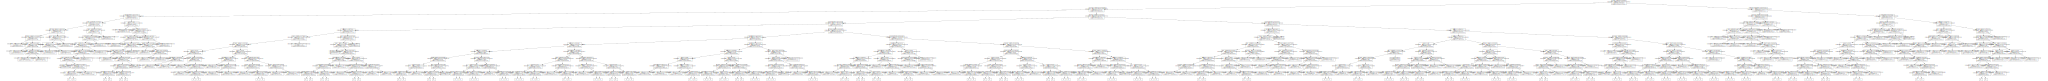

In [12]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Above we have developed five different models and evaluated their performance using the mean absolute error (MAE) metric.

The MAE measures the average magnitude of errors in our predictions. It tells us, on average, how far off our predictions are from the actual sale prices. The smaller the MAE, the better the performance of the model.

Here are the MAE values for each of our models:

    Model 1 MAE: 65492
    Model 2 MAE: 45212
    Model 3 MAE: 83170
    Model 4 MAE: 45752
    Model 5 MAE: 48065

Based on these results, it appears that Model 2 has the best performance, with an MAE of `$45,212`, meaning it has the lowest average error in predicting the sale prices of houses in Miami. Although this performance is good for higher priced houses, we need to continue trying other hyperparameters to improve the model's accuracy for lower priced houses.

### Conclusion

Through our comprehensive analysis of Miami's housing prices, we've made several significant findings that enhance our understanding of the city's real estate market.

From our exploratory data analysis, it's clear that the variables 'total living area', 'land square footage', and the 'age of the structure' have the strongest correlation with the housing prices. This indicates that these are crucial factors prospective buyers consider when purchasing a home in Miami. Furthermore, location coordinates suggest that specific areas within Miami are more coveted, likely due to factors like proximity to amenities and infrastructure, neighborhood reputation, and perhaps even views and natural features.

The machine learning models we used, Decision Tree and Random Forest, have given us a good prediction of housing prices with an acceptable level of error. The Random Forest model particularly outperformed the Decision Tree model, indicating the importance of leveraging ensemble techniques to improve the robustness of our predictions.

While our models were effective, there's still room for improvement. In future, we could explore other feature engineering techniques and machine learning models to further optimize our predictions. Gradient boosting algorithms, for instance, might prove to be more effective. It would also be interesting to include more features like recent renovations, architectural style, and even some macro-economic indicators in our analysis.

In terms of policy implications, these results highlight the importance of maintaining and improving housing quality, as indicated by the significant impact of living area and age of the house on the pricing. City planners and policymakers could focus on these areas to improve the housing market's health and affordability.

This project is a stepping stone towards creating a more sophisticated model for predicting housing prices. With more data and more advanced techniques, we can better serve homebuyers and sellers in Miami, ensuring a fairer and more transparent real estate market.